# Feature Scaling

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler , normalize

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

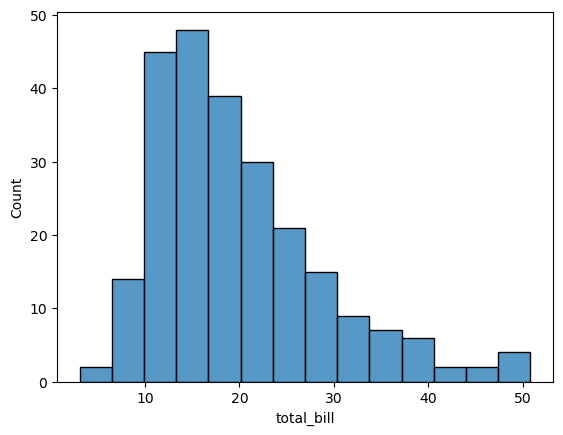

In [15]:
sns.histplot(df['total_bill'])

In [5]:
mean = np.mean(df['total_bill'])
std = np.std(df['total_bill'])

In [7]:
mean , std

(19.785942622950824, 8.88415057777113)

In [9]:
normalized_data = []
for i in list(df['total_bill']):
    z_score = (i-mean)/std
    normalized_data.append(z_score)

In [10]:
normalized_data

[-0.3147113050904947,
 -1.0632353132988699,
 0.13777989987156108,
 0.4383151031672544,
 0.5407447042905058,
 0.6195367051545452,
 -1.239954515236787,
 0.7985071071171492,
 -0.5342033074974618,
 -0.5634689078183908,
 -1.071114513385274,
 1.7417599174609364,
 -0.49143050702841173,
 -0.15262490331304188,
 -0.5578409077566736,
 0.20193910057513573,
 -1.0643609133112133,
 -0.39350330595453414,
 -0.31696250511518154,
 0.09725829942719756,
 -0.21003050394255615,
 0.056736698982834455,
 -0.45203450659639205,
 2.2100095225958003,
 0.003833498402693769,
 -0.22241210407833414,
 -0.7221785095588132,
 -0.7987193103981659,
 0.2154463007232569,
 -0.01530170180714459,
 -1.152157714274,
 -0.16162970341178906,
 -0.5319521074727749,
 0.10176069947657156,
 -0.22578890411536412,
 0.4810879036363043,
 -0.3912521059298474,
 -0.3214649051645551,
 -0.12335930299211276,
 1.2926455125359113,
 -0.4216433062631197,
 -0.26180810451035363,
 -0.6580193088552382,
 -1.1375249141135357,
 1.1947183114620337,
 -0.16838330

<AxesSubplot:ylabel='Count'>

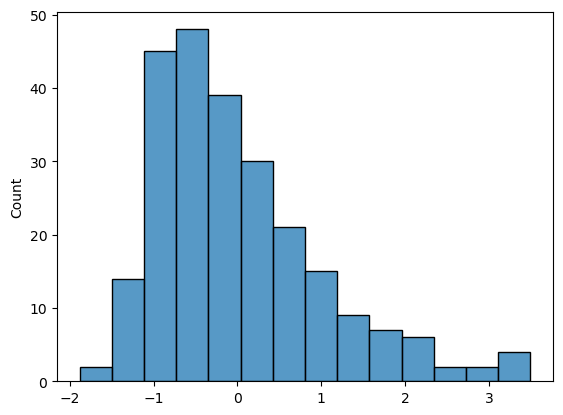

In [13]:
sns.histplot(normalized_data)

## Standardization

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(df[['total_bill']])

StandardScaler()

In [23]:
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [28]:
# another method
pd.DataFrame(scaler.fit_transform(df[['total_bill']]),columns = ['total_bill'])

,total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [30]:
# Creating 2 columns for it:
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns = ['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [31]:
# Scaling down the values of our choice
scaler.transform([[13,4]])

C:\Users\Huzaifa Khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

## Normalization (Min-Max Scaler)

In [32]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [34]:
min_max = MinMaxScaler()

In [36]:
# Scaling down the values:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

## Unit Vector

In [45]:
df1 = pd.DataFrame(normalize(df[['distance','fare','tip']]), columns=['distance','fare','tip'])

In [46]:
df1.head()

,distance,fare,tip
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
